In [2]:
from time import sleep

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm

from settings import TOTALLY_NOT_A_PARSER


from custom_module import parse_yf_esg, get_tickers, parse_mc


# Введение

# Часть первая: Сбор данных

Для сбора данных нам необходимо для начала получить максимально возможное количество тикеров. Самая большая бесплатная база данных, которую мы нашли, это файл на сайте https://www.nasdaq.com/market-activity/stocks/screener
Далее необходимо собрать все необходимые данные: значения оценок esg рисков, прибыль по годам, цены на акции и прочие


## Парсинг

In [3]:
tickers = get_tickers()
df_esg = pd.DataFrame(parse_yf_esg(), index=tickers)
df_true_esg = df_esg[df_esg['Environment Risk Score'].notna()]
df_fins = pd.DataFrame(parse_mc(df_true_esg['Symbol']))

In [56]:
df_true_esg = pd.read_csv('true_esg.csv')
df_fins = pd.DataFrame(parse_mc(df_true_esg['Symbol'])[0])

100%|██████████| 781/781 [05:01<00:00,  2.59it/s]


In [ ]:
df_fins.to_csv('financials.csv')

## Данные

In [55]:
df_fins = pd.read_csv('financials.csv').drop('Unnamed: 0', axis = 1)
df_fins = df_fins[df_fins['Чистая прибыль 2020'].notna()]

Компания                object
Чистая прибыль 2019    float64
Чистая прибыль 2020    float64
Чистая прибыль 2021    float64
Капитализация 2019     float64
Капитализация 2020     float64
Капитализация 2021     float64
dtype: object

## EDA

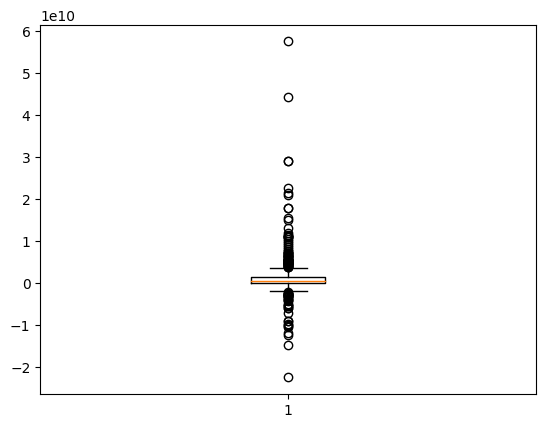

In [47]:
plt.boxplot(df_fins['Чистая прибыль 2020']);

In [24]:
df_fins

,Компания,Чистая прибыль 2019,Чистая прибыль 2020,Чистая прибыль 2021,Капитализация 2019,Капитализация 2020,Капитализация 2021
0,A,1.070000e+09,7.190000e+08,1.210000e+09,2.540000e+10,3.600000e+10,4.200000e+10
1,AA,-1.120000e+09,-1.700000e+08,4.290000e+08,2.650000e+09,4.270000e+09,1.100000e+10
2,AAL,1.690000e+09,-8.880000e+09,-1.990000e+09,1.230000e+10,1.010000e+10,1.110000e+10
3,AAP,4.870000e+08,NaN,4.930000e+08,9.900000e+09,NaN,1.560000e+10
4,AAPL,5.530000e+10,5.740000e+10,9.470000e+10,1.150000e+12,2.000000e+12,2.740000e+12
...,...,...,...,...,...,...,...
776,YUM,1.290000e+09,9.040000e+08,1.580000e+09,3.260000e+10,3.070000e+10,3.620000e+10
777,Z,-3.050000e+08,-1.620000e+08,-5.280000e+08,9.770000e+09,2.920000e+10,1.260000e+10
778,ZBH,1.130000e+09,-1.390000e+08,4.020000e+08,3.100000e+10,3.070000e+10,2.570000e+10
779,ZTR,NaN,NaN,NaN,NaN,NaN,NaN
